<a href="https://colab.research.google.com/github/PHMark/project_mbti/blob/master/Personalitics_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Personalitics [MBTI Classifier]</h1>

# 1. Project Overview

Personalitics is a text analytics project that aims to know if it's possible to classify a person based on his/her social media posts. To create an analytical model, this project will use a pre-labeled web scraped data from <i>16Personalities' Discussion Forum</i>. 
<br>

> Credits: 16personalities.com

<b> What is 16Personalities? </b>
<br>


16Personalities is a web platform that helps people know more about their personality type. They are using the Myers–Briggs Type Indicator (MBTI) model on their personality type test to evaluate an individual. They have a discussion forum which allows their members to ask questions and discuss a particular topic.
<br>

<b> MBTI Overview: </b>

MBTI is an introspective self-report questionnaire indicating differing psychological preferences in how people perceive the world and make decisions. MBTI divides everyone into 16 distinct personality types across 4 axis:

*  Introversion (I) – Extroversion (E)
*  Intuition (N) – Sensing (S)
*  Thinking (T) – Feeling (F)
*  Judging (J) – Perceiving (P)

## 1.1 Sources/Useful Links

<b>Sources:</b> <br>
https://en.wikipedia.org/wiki/Myers%E2%80%93Briggs_Type_Indicator

<b>Useful Links:</b><br>
https://www.myersbriggs.org/my-mbti-personality-type/mbti-basics/ <br>
https://www.16personalities.com/articles/our-theory

## 1.2 Problem Statement

*  Identify what is the MBTI of a post owner from 16Personalities' Discussion Forum.
*  This could be very useful for various organizations, especially on their HR analytics / Marketing teams. 
<i>ie.</i> Help them develop a prior knowledge on their Job Applicants by researching Job Applicants' social media posts. Or help them taylor cohorts for their marketing campaigns.

## 1.3 Objective(s)

* The main objective of this project is to provide a probability that a post belongs to a particular personality type (among the 16 personalities).

# 2. Machine Learning Problem

## 2.1 Data

### 2.1.1 Data Overview

<b> Data Gathering: </b> <br>
<p> 
- The data was gathered from Personalitycafe's Forum, 16personalities' Forum, and Kaggle. I collected each of the dataset thru web scraping, except for the dataset from Kaggle. <br><br>
- Datasets:  <br>
1. data_discussion_16personalities.csv [Size: N mb]<br>
2. data_personalitycafe.csv [Size: N mb]<br>
3. data_pub_16personalities.csv. [Size: N mb]<br><br>

Note: Although there are various features on each dataset, I decided to use only the text data to normalize the feature set and be able to test it on my use case. <br><br>
<b> Data Dictionary: </b> <br>
    xxxxx

## 2.2 Mapping to a Machine Learning Problem

### 2.2.1 Type of Machine Learning Problem

This is a multiclass classification problem because we are going to to classify a post either of the 16 personalities.

### 2.2.2 Performance Metric

<b>Metric(s):</b><br>
* Log-loss
* F1 Score 

<p>We'll use Log Loss to see the probability of a post belonging to a category. (We will see later why I chose F1 Score as a metric.)</p>

## 2.3 Train and Test Set Configuration

We are going to randomly split the data into 70:30 ratio.

## 3. Exploratory Data Analysis

In [0]:
!pip install --upgrade plotly
!pip install emojis

In [204]:
# Loading the required modules
import re
import plotly.express as px
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import json
nltk.download('stopwords')
from nltk.corpus import stopwords
import plotly.express as px
from tqdm import tqdm

OUTPUT_DIR = r'drive/My Drive/ML Projects/Personalitics/output/'
stopwords = set(stopwords.words('english'))
emojis = json.loads(open(OUTPUT_DIR + 'emoji_pack.json').read())
try:
  stopwords.remove('not')
  stopwords.add('will')
except:
  pass
print((stopwords))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'between', 'over', 'were', "hasn't", 'during', 'hasn', 'he', 'above', "aren't", 'shouldn', 'weren', 'few', 'have', "mustn't", 'those', 'ourselves', 'while', 'just', "you'll", 'his', 'of', 'what', 'am', 'can', 'couldn', 'we', "won't", "don't", 'you', 'it', 'did', 'but', 'isn', 'below', 'd', 'through', "wasn't", 'she', 'more', "you're", 'yours', 'against', 'which', "should've", 'a', 'don', 'some', 're', "you've", 'ma', 'doesn', 'i', 'down', 'who', "wouldn't", 'having', 'now', 'these', 'both', 'only', 'after', 'himself', 'herself', 'them', 'been', 'does', 'then', 'nor', 'itself', 'no', 'as', 'y', "needn't", 'its', 'are', 'than', 'all', 'off', 'into', 'him', 'there', 'doing', 'being', 'wouldn', "haven't", 'in', 'out', "you'd", 'the', 'yourselves', 'with', 'up', 'each', 'from', 'because', 'shan', 'on', "shouldn't", 'yourself', 'hers', 'had', 'they', 'if', 'about', 'be', 'y

### 3.0.1 Loading the Datasets

In [0]:
# Read all DataFrames from csv files
df_16p_disc = pd.read_csv(OUTPUT_DIR + 'aggregated/data_discussion_16personalities.csv')
df_16p_pub = pd.read_csv(OUTPUT_DIR + 'aggregated/data_pub_16personalities.csv')
df_ps_cafe = pd.read_csv(OUTPUT_DIR + 'aggregated/data_personalitycafe.csv')

# Rename columns using a defined standard
df_16p_disc = df_16p_disc.rename({'sub-answerBody': 'comment', 'sub-type': 'type', 'sub-approvedAtNice': 'median_dow', 'sub-dow': 'median_hour'}, axis=1)
df_16p_pub = df_16p_pub.rename({'child_text': 'comment', 'user_type': 'type', 'date': 'median_hour', 'dow': 'median_dow'}, axis=1)
df_ps_cafe = df_ps_cafe.rename({'child_text': 'comment', 'user_type': 'type', 'date': 'median_hour', 'dow': 'median_dow'}, axis=1)

# Drop unnecessary columns
df_16p_pub.drop(columns=['user_id', 'median_hour', 'median_dow'], inplace=True, axis=1)
df_16p_disc.drop(columns=['sub-profileUrl', 'median_hour', 'median_dow'], inplace=True, axis=1)
df_ps_cafe.drop(columns=['user_id', 'median_hour', 'median_dow'], inplace=True, axis=1)

# Reorder the columns of each DataFrame
new_order = ['type', 'comment']
df_16p_disc = df_16p_disc[new_order]
df_16p_pub = df_16p_pub[new_order]
df_ps_cafe = df_ps_cafe[new_order]

df = pd.concat([df_16p_disc, df_16p_pub, df_ps_cafe])

# Flush out unnecessary variables
df_16p_disc = None
df_16p_pub = None
df_ps_cafe = None
del df_16p_disc
del df_16p_pub
del df_ps_cafe

In [0]:
# Print the dimensions of df
print('Number of Rows: {}\nNumber of Columns: {}'.format(*df.shape))

Number of Rows: 39063
Number of Columns: 2


In [0]:
# Show a subset of our dataset
df.head()

,type,comment
0,ESFP,The secretive guy wrote: There's a thread just...
1,INFP,I wanna write a little story; because reading ...
2,INTP,"caly, goddess of love wrote: my friend is gonn..."
3,INFP,"I would focus on myself, and continue to be fr..."
4,INTJ,"There are an equal number of pros and cons, to..."


In [0]:
# How many NULL values do we have?
df.isna().sum()

type       0
comment    5
dtype: int64

In [0]:
# Show the high level statistics of our dataset
df.describe()

,type,comment
count,39063,39058
unique,16,38885
top,INFP,Hi
freq,8272,6


In [0]:
# Show the unique values on our target column
print('Unique Values of the target column:', df['type'].unique().tolist())

Unique Values of the target column: ['ESFP', 'INFP', 'INTP', 'INTJ', 'ISTJ', 'ENTP', 'INFJ', 'ENFJ', 'ENFP', 'ENTJ', 'ISFP', 'ISFJ', 'ISTP', 'ESTP', 'ESFJ', 'ESTJ']


In [0]:
# Print a comment sample
print('SAMPLE #1:', df['comment'].sample(1).iloc[0])
print()
print('SAMPLE #2:', df['comment'].sample(1).iloc[0])
print()
print('SAMPLE #3:', df['comment'].sample(1).iloc[0])

SAMPLE #1: Yes. Always a build-up of anxiety in the queue, but the best rush during all those really scary bits :). And a great feeling afterwards!|||I've had some really useful answers on this forum before when I first submitted a 'what type am I?' post - but which was mainly in answer to doubts over whether I was a T or an F. The more I've come to understand about myself, the more I appreciate and accept I'm an F. But lately I've wondered more about whether I'm a Perceiver or Judger. And what I want to know is whether or not I'm reading my actual personality or the one I adopt to deal with what's around me. 
What I've tentatively concluded is that I'm either a stressed-out ISFP or a lazy/depressed ISFJ. Hopefully you'll see what I mean.
Going to write out why I have cause to think either:ISFP - Fi/Se- truest-sounding personality profile. What particularly resonates - appreciation of aesthetics (esp. sights and music) and dislike of conflict. 
- am at my happiest when just plain enjoy

In [0]:
# Removing the row of the null comments
df = df[~df['comment'].isna()]

<b> Observations: <b> <br>
*  There are 5 null values in our comment column. 
*  There are 39,063 unique data points, which means 39,063 unique users.
*  Comment column needs some cleaning. For instance, there are some non-alphabetical words occuring in the comments. 
*  In Sample Comment #1, there are lots of mentioned personality types and lots of Capitalized words. We will see more of the text data later in the feature analysis part.

## 3.1  Target Variable Analysis

### 3.1.1 Check the Target Column's Distribution

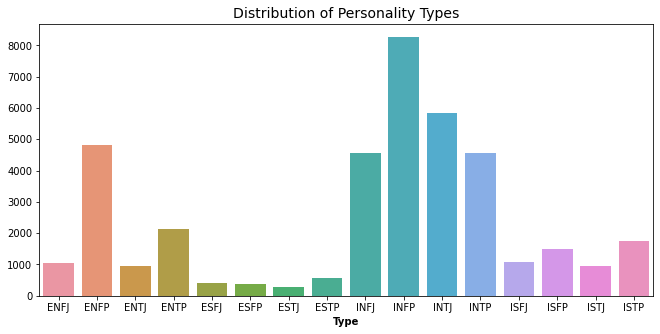

In [0]:
tmp_data_16p_dis = pd.DataFrame(df['type'].value_counts().reset_index().rename({'index': 'type', 'type': 'freq.'}, axis=1)).sort_values(by='type')
cmap = sns.color_palette("Accent", n_colors=16) 
cmap = dict(zip(df['type'].values, cmap))
plt.figure(figsize=(11, 5))
plt.title('Distribution of Personality Types', fontsize=14)
sns.barplot(data=tmp_data_16p_dis, x='type', y='freq.')
plt.ylabel('')
plt.xlabel('Type', fontweight='bold')
plt.show()

<b>Observation(s):<b> <br>
*  Our dataset was suffering from class imbalance issue.
*  Majority of the datapoints belongs to INFP, followed by INTJ.
*  Among Extraverts, ENFP has the most number of datapoints.

In [0]:
type_global_distrib = {'ISFJ': 13.8, 'ESFJ': 12.3, 'ISTJ': 11.6, 'ISFP': 8.8,
                       'ESTJ': 8.7, 'ESFP': 8.5, 'ENFP': 8.1, 'ISTP': 5.4, 
                       'INFP': 4.4, 'ESTP': 4.3, 'INTP': 3.3, 'ENTP': 3.2, 
                       'ENFJ': 2.5, 'INTJ': 2.1, 'ENTJ': 1.8, 'INFJ': 1.5}

# Creating a DataFrame for the Global Data Representation
type_global_distrib_val = list(map(lambda x: x/100, type_global_distrib.values()))
type_global_distrib_col = type_global_distrib.keys()
global_type = pd.DataFrame([type_global_distrib_col, type_global_distrib_val]).T
global_type.columns = ['type', 'freq.']
global_type = global_type.sort_values(by='type')
global_type['freq.'] = global_type['freq.'] * tmp_data_16p_dis['freq.'].sum()

### 3.1.2 Comparing our Dataset Distribution to the Global Data

Since MBTI itself is an active research area, there are lots of available resources of this domain that can be found on the internet. Because of that, we have a downloaded data of the Global Representation of 16 personality types that we can compare to our Dataset. 

> Credits: <a href="https://www.careerplanner.com/MB2/TypeInPopulation.cfm">Career Planner</a>

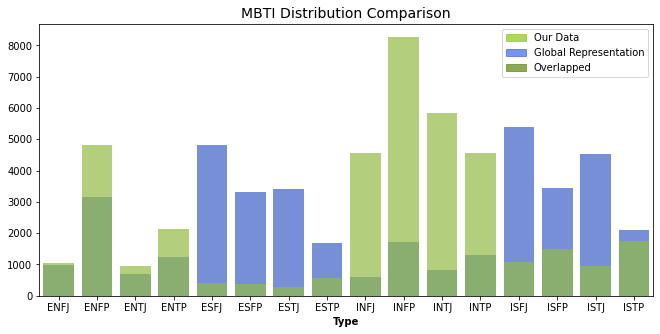

In [0]:
green_patch = mpatches.Patch(color='yellowgreen', label='Our Data', alpha=0.8)
blue_patch = mpatches.Patch(color='royalblue', label='Global Representation', alpha=0.7)
overlap_patch = mpatches.Patch(color='olivedrab', label='Overlapped', alpha=0.77)

plt.figure(figsize=(11, 5))
plt.title('MBTI Distribution Comparison', fontsize=14)
sns.barplot(data=global_type, x='type', y='freq.', color='royalblue', alpha=0.8, label='Global Representation')
sns.barplot(data=tmp_data_16p_dis, x='type', y='freq.', color='yellowgreen', alpha=0.7, label='Our Data')
plt.legend(handles=[green_patch, blue_patch, overlap_patch])
plt.xlabel('Type', fontweight='bold')
plt.ylabel('')
plt.show()

<b>Observation(s):<b>
*  The distribution of our data does not follow the distribution of the global data representation.
*  Lots of Intuitives was over represented in our dataset, especially introverts. I think this is because social media is their main medium for "socializing" and for reflecting their thoughts/opinion. 
*  In contrast, Sensors was less represented in our dataset. I think this is because of their Sensor nature which makes them busy in other things like physical/outdoor activities.    

### 3.1.3 Slicing the Target Column

Let us find out if using other representation of our target column will help us ease the class imbalance problem. ie. 
<br> Slicing the target variable into the 4 personality aspects namely: 


A.) Mind (Introvert or Extravert?)<br>
B.) Energy (Sensing or Intuition?)<br>
C.) Nature (Thinking or Feeling?)<br>
D.) Tactics (Perception or Judging?)<br>


If you haven't read the theory in the link provided at Section 1.1 (Sources/Useful Links), please do so to understand more about the aforementioned terminologies. In any case, let's see what the distribution looks like for these 4 types.

In [0]:
# Create a new column for each personality aspect
df['I-E'] = df['type'].str.contains('I').astype(int)
df['N-S'] = df['type'].str.contains('N').astype(int)
df['T-F'] = df['type'].str.contains('T').astype(int)
df['J-P'] = df['type'].str.contains('J').astype(int)

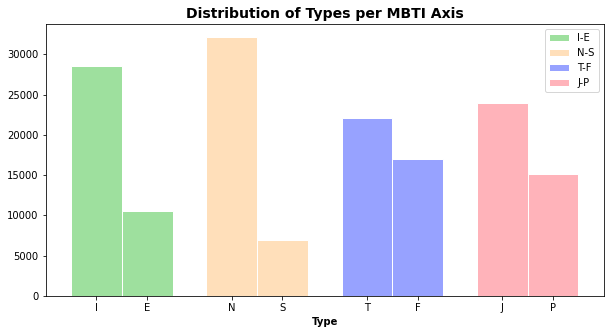

In [0]:
tmp_data1 = pd.DataFrame(df['I-E'].value_counts().reset_index().rename({'I-E': 'freq.'}, axis=1))
tmp_data2 = pd.DataFrame(df['N-S'].value_counts().reset_index().rename({'N-S': 'freq.'}, axis=1))
tmp_data3 = pd.DataFrame(df['T-F'].value_counts().reset_index().rename({'T-F': 'freq.'}, axis=1))
tmp_data4 = pd.DataFrame(df['J-P'].value_counts().reset_index().rename({'J-P': 'freq.'}, axis=1))

bar_width = 0.3
spacer_ls = np.arange(0.1, stop=0.5, step=0.3)
plt.figure(figsize=(10, 5))

plt.title('Distribution of Types per MBTI Axis', fontsize=14, fontweight='bold')
plt.bar(spacer_ls, tmp_data1['freq.'], color='#9ee09e', width=bar_width, edgecolor='white', label='var1')
plt.bar(spacer_ls+0.8, tmp_data2['freq.'], color='#ffdfba', width=bar_width, edgecolor='white', label='var2')
plt.bar(spacer_ls+1.6, tmp_data3['freq.'], color='#97a2ff', width=bar_width, edgecolor='white', label='var3')
plt.bar(spacer_ls+2.4, tmp_data4['freq.'], color='#ffb3ba', width=bar_width, edgecolor='white', label='var4')

plt.xlabel('Type', fontweight='bold')
plt.xticks([spacer_ls[0], spacer_ls[1], (spacer_ls[0]+0.8), (spacer_ls[1]+0.8),
            (spacer_ls[0]+1.6), (spacer_ls[1]+1.6), (spacer_ls[0]+2.4), (spacer_ls[1]+2.4)],
           ['I', 'E', 'N', 'S', 'T', 'F', 'J', 'P'])
 
plt.legend(['I-E', 'N-S', 'T-F',  'J-P'])
plt.show()

<b>Observation(s):<b><br>
*  Although, the distribution for T-F axis and J-P axis is slightly different, the distribution for I-E axis and N-S axis is very different which demands our attention. We will fix this issue later, after the feature extraction stage.
*  This is much better than the previous distribution of types. Before, we need to deal with 16 imbalanced classes, now, we only need to addressed 4 imbalanced binary classes.

### 3.1.4 Check the Correlation between the 4 types

We will check the correlation between the 4 major axes of MBTI before we can use it.
Correlation in our independent variables can be a problem during the modeling phase because it will be difficult for our model to estimate the relationship between our dependent variables and independent variables, <i>independently</i>. 
<br>

ie. As the probability of a person being an Introvert increases, the probability of him being a Thinker decreases. We can say that there is a negative correlation between the two variables, and it will be hard for our model to estimate how introvert a person is, versus how thinker a person is, <i>independently</i>.

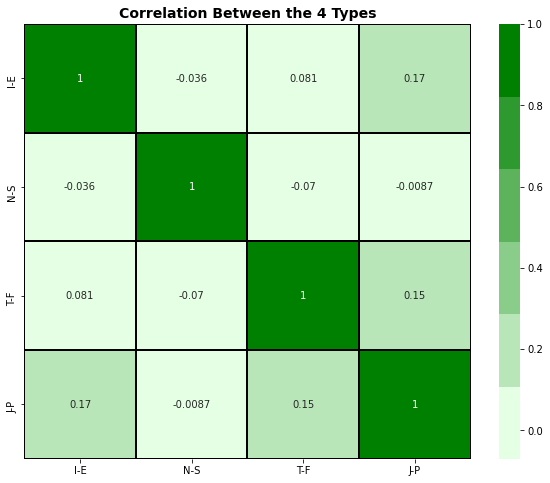

In [0]:
plt.figure(figsize=(10, 8))
plt.title('Correlation Between the 4 Types', fontsize=14, fontweight='bold')
corr = df[['I-E', 'N-S', 'T-F',  'J-P']].corr()
sns.heatmap(data=corr, annot=True, linewidths=1, linecolor='black',
            cmap=sns.light_palette("green"))
plt.show()

<b>Observation(s):<b>
*  The correlation between the 4 types is close to zero, which means there is a very little correlation between those variables, and that is good.

### 3.1.5 Checking the Correlation between the 4 types v2

Just for the sake of my curiosity I will take a glimpse in the distribution of the cognitive functions that are assigned on each type.
<br>
<br>
Cognitive Function is the derivative of the 4 personality aspects.Each personality type has their unique set of cognitive function, each of which is under the dominant, auxiliary, tertiary, or inferior function. 
<br>

The list below are the possible values for each function:

A.)  Ni- Perspective (of long range outcome or big picture vision)

B.)  Ne-Exploration (of ideas)

C.)  Ti-Accuracy (by pin pointing flaws/deep analysis)

D.)  Te- Effectiveness (by organizing and planning tasks and getting them done)

E.)  Si- Memory (of past sensory data or tradition)

F.)  Se- Sensation (by absorbing immediate reality with 5 senses)

G.)  Fi- Authenticity (based on personal values, ethics and sense of beauty)

H.)  Fe- Harmony (by thinking about what is appropriate to say or do in a social setup which benefits almost everyone)

> Credits: https://www.quora.com/What-is-each-MBTI-cognitive-function-good-for

In [0]:
x = '''INTP = Ti > Ne > Si > Fe
ISTP = Ti > Se > Ni > Fe
ENTP = Ne > Ti > Fe > Si
ENFP = Ne > Fi > Te > Si
ISFP = Fi > Se > Ni > Te
INFP = Fi > Ne > Si > Te
INTJ = Ni > Te > Fi > Se
INFJ = Ni > Fe > Ti > Se
ESTJ = Te > Si > Ne > Fi
ENTJ = Te > Ni > Se > Fi
ESFJ = Fe > Si > Ne > Ti
ENFJ = Fe > Ni > Se > Ti
ISTJ = Si > Te > Fi > Ne
ISFJ = Si > Fe > Ti > Ne
ESTP = Se > Ti > Fe > Ni
ESFP = Se > Fi > Te > Ni'''

type_json = {}
function_order = ['dominant', 'auxiliary', 'tertiary', 'inferior']
function_one_hot = {'ti': 1, 'ni': 1, 'si': 1, 'fi': 1,
                    'te': 0, 'ne': 0, 'se': 0, 'fe': 0}
for types in x.split('\n'):
  p_type = types.split('=')[0].strip()
  functions = tuple(map(str.strip, types.split('=')[1].lower().split('>')))
  type_json[p_type] = dict(zip(function_order, functions))

def get_functions(t):
  f_dict = type_json[t]
  one_hot_vector = []
  for i in function_order:
    one_hot_mapper = f_dict[i]
    one_hot_vector.append(function_one_hot[one_hot_mapper])
  return pd.Series(list(f_dict.values()))

df[['dominant', 'auxiliary', 'tertiary', 'inferior']] = df['type'].apply(get_functions)

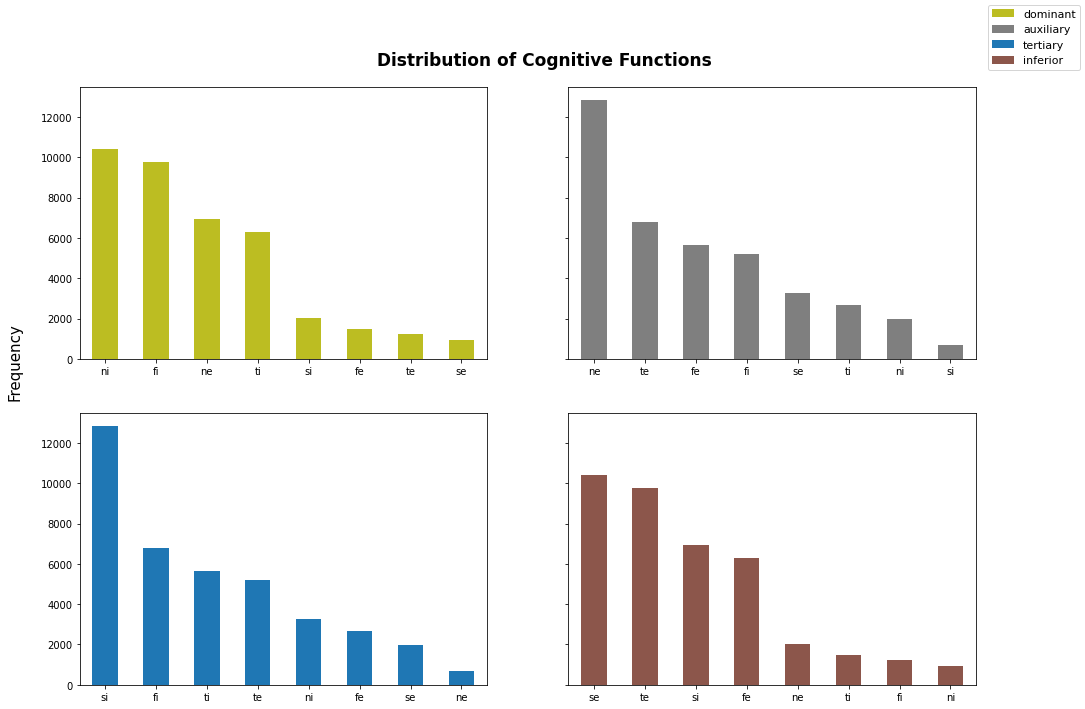

In [0]:
plt.close('all')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharey=True)
fig.suptitle('Distribution of Cognitive Functions', 
             fontsize=17, y=0.93, fontweight='bold')

df['dominant'].value_counts().plot(kind='bar', ax=ax[0][0], color='tab:olive')
df['auxiliary'].value_counts().plot(kind='bar', ax=ax[0][1], color='tab:gray')
df['tertiary'].value_counts().plot(kind='bar', ax=ax[1][0], color='tab:blue')
df['inferior'].value_counts().plot(kind='bar', ax=ax[1][1], color='tab:brown')

ax[0][0].xaxis.set_tick_params(rotation=0)
ax[0][1].xaxis.set_tick_params(rotation=0)
ax[1][0].xaxis.set_tick_params(rotation=0)
ax[1][1].xaxis.set_tick_params(rotation=0)

fig.text(0.01, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', fontsize=15)

handles = []
labels = []
for a in ax:
  for i in a:
    h, l = i.get_legend_handles_labels()
    handles.append(h[0])
    labels.append(l[0])

fig.legend(handles, labels, loc='upper right', fontsize=11)
plt.subplots_adjust(left=0.07, bottom=0.05)
fig.show()

In [0]:
print('Dominant Ni:', df[df['dominant'] == 'ni'].type.unique())
print('Auxiliary Ne:', df[df['auxiliary'] == 'ne'].type.unique())
print('Tertiary Si:', df[df['tertiary'] == 'si'].type.unique())
print('Inferior Se:', df[df['inferior'] == 'se'].type.unique())

Dominant Ni: ['INTJ' 'INFJ']
Auxiliary Ne: ['INFP' 'INTP']
Tertiary Si: ['INFP' 'INTP']
Inferior Se: ['INTJ' 'INFJ']


In [0]:
df = df.drop(columns='dominant	auxiliary	tertiary	inferior'.split(), axis=1)

Class imbalance is still present at this level of granularity. I will leave this for now and stick with the 4 personality aspects.

## 3.2 Data Preprocessing 

Before I proceed on the Analysis part, I will perform basic data cleanup first on our feature set. Basically, I will remove/replace some string that I do not need in my analysis. Later I will do further data preprocessing as the need arises.

In [0]:
def rep(text):
    grp = text.group(0)
    if len(grp) > 1:
        return grp[0:1] # can change the value here on repetition

def unique_char(rep, sentence):
    convert = re.sub(r'(\w)\1+', rep, sentence) 
    return convert
    
def get_unique_char(string):
  return unique_char(rep, string)

def remove_alias(string):
    return re.sub('\*', ' ', string).strip()

def remove_html_tags(string):
    return re.sub('<.+?>', ' ', string).strip()

def decontract_string(string):
    # https://stackoverflow.com/a/47091490/4084039
    # specific
    phrase = re.sub(r"won't", "will not", string)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"thx", " thanks", phrase)
    phrase = re.sub(r"thnx", " thanks", phrase)
    return phrase.strip()
  
def remove_multi_whitespace(string):
  return re.sub(r'\s+', ' ', string).strip()

def replace_emoji(samp):
    samp = samp.lower()
    samp = samp.replace(r':)', '[smile-emoji]')
    samp = samp.replace(r'◠‿◠✿', '[smile-emoji]')
    samp = samp.replace(r':p', '[tongue-out-emoji]')
    samp = samp.replace(r':d', '[big-smile-emoji]')
    samp = samp.replace(r':(', '[sad-emoji]')
    samp = samp.replace(r'^_^', '[smile-emoji]')
    return samp.strip()

def replace_url(string):
  return re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '[url]', string)

def remove_special_char(string):
  return re.sub('[^a-zA-Z0-9\n]', ' ', string)

def remove_stopwords(string):
  return ' '.join([i for i in string.split() if i.lower() not in stopwords])

def replace_quot(string):
  return string.replace('&quot;', ' ')

def preprocess_before_feature_engineering(string):
  string = remove_html_tags(string)
  string = decontract_string(string)
  string = remove_multi_whitespace(string)
  return string

def preprocess_after_feature_engineering(string):
  string = string.lower()
  string = replace_emoji(string)
  string = replace_url(string)
  string = remove_alias(string)
  string = replace_quot(string)
  string = remove_special_char(string)
  string = remove_stopwords(string)
  return string

In [0]:
from tqdm import tqdm
tqdm.pandas()
df['comment'] = df['comment'].progress_apply(preprocess_before_feature_engineering)
df = df[df['comment'].str.len() > 1]

<b>DataFrame after preprocessing</b>

In [202]:
df.head()

,type,comment,I-E,N-S,T-F,J-P
0,ESFP,The secretive guy wrote: There's a thread just...,0,0,0,0
1,INFP,I wanna write a little story; because reading ...,1,1,0,0
2,INTP,"caly, goddess of love wrote: my friend is gonn...",1,1,1,0
3,INFP,"I would focus on myself, and continue to be fr...",1,1,0,0
4,INTJ,"There are an equal number of pros and cons, to...",1,1,1,1


In [158]:
print('PREPROCESSED TEXT #1:', df['comment'].sample(1).iloc[0])
print()
print('PREPROCESSED TEXT #2:', df['comment'].sample(1).iloc[0])
print()
print('PREPROCESSED TEXT #3:', df['comment'].sample(1).iloc[0])

PREPROCESSED TEXT #1: I feel exactly the same way. It's definitely an inconvenient preference to have at times, but I think it's worth it. Being part of a relaxed, hilarious and generally judgement-free group of friends has been an experience that I wouldn't take back (even if it gets a little complex sometimes). It's super great to know that there's someone else out there in a similar situation. I haven't let gender or the opinions of outsiders get in the way of making good friends as of yet, and I hope you manage to do the same :)

PREPROCESSED TEXT #2: So I married really young to an ESFJ. At 21 to my one and only real boyfriend ever. I recently found out that I am in a relationship of benefit according to socionics and it fits my marriage description well. I am the beneficiary and I don't like it because I feel like my husband doesn't really understand me for who I am inside. He doesn't like the same things I like to talk about and it feels like he undervalues me. Although he tells

As you can see, there are remaining special characters like dots, parenthesis, quotes, etc. This is okay for now, we will deal with those characters later.

## 3.3 Feature Analysis and Design

### 3.3.1 Feature Design

In [0]:
def count_all_upper(string):
  total_ls = []
  for word in string.split():
    total_ls.append(int(bool(re.match(r'[A-Z]+$', word))))
  return sum(total_ls)

def count_with_upper(text):
    line = re.findall(r'\b[A-Z]\w+', text)
    return len(line)

def count_punct(text):
    line = re.findall(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*', text)
    string="".join(line)
    return len((string))

def count_emoji(string):
  return len([i for i in string.split() if i in emojis.keys()])

def count_word_aliasing(string):
  return len(re.findall('\*(.+?)\*', string))

def count_word_quoting(string):
  string = string.replace('&quot;', '"')
  quotes = len(re.findall('\"(.+?)\"', string))
  return quotes

def count_post(string):
  return len(string.split('|||'))

def count_word(string):
  return len(string.replace('|||', ' ').split())

def count_character(string):
  return len(string.replace('|||', ' '))

def count_numbers(string):
    line = re.findall(r'[0-9]+', string)
    return len(line)

In [0]:
df['post_count'] = df['comment'].apply(count_post)
df['word_count'] = df['comment'].apply(count_word)
df['character_count'] = df['comment'].apply(count_character)
df['title_case_count'] = df['comment'].apply(count_with_upper)
df['caps_count'] = df['comment'].apply(count_all_upper)
df['punct_count'] = df['comment'].apply(count_punct)
df['emoji_count'] = df['comment'].apply(count_emoji)
df['alias_count'] = df['comment'].apply(count_word_aliasing)
df['quoted_words_count'] = df['comment'].apply(count_word_quoting)
df['digit_count'] = df['comment'].apply(count_numbers)

df['words_per_post'] = df['word_count'] / df['post_count']
df['characters_per_post'] = df['character_count'] / df['post_count']
df['title_case_per_post'] = df['title_case_count'] / df['post_count']
df['caps_per_post'] = df['caps_count'] / df['post_count']
df['puncts_per_post'] = df['punct_count'] / df['post_count']
df['emoji_per_post'] = df['emoji_count'] / df['post_count']
df['alias_per_post'] = df['alias_count'] / df['post_count']
df['quoted_words_per_post'] = df['quoted_words_count'] / df['post_count']
df['digit_count_per_post'] = df['digit_count'] / df['post_count']

<b> Our Data after adding features </b>

In [206]:
df.head()

,type,comment,I-E,N-S,T-F,J-P,post_count,word_count,character_count,title_case_count,caps_count,punct_count,emoji_count,alias_count,quoted_words_count,digit_count,words_per_post,characters_per_post,title_case_per_post,caps_per_post,puncts_per_post,emoji_per_post,alias_per_post,quoted_words_per_post,digit_count_per_post
0,ESFP,The secretive guy wrote: There's a thread just...,0,0,0,0,1,21,122,6,0,5,0,0,0,0,21.000000,122.000000,6.000000,0.000000,5.000000,0.0,0.0,0.000000,0.000000
1,INFP,I wanna write a little story; because reading ...,1,1,0,0,2,475,2625,49,9,92,0,0,2,1,237.500000,1312.500000,24.500000,4.500000,46.000000,0.0,0.0,1.000000,0.500000
2,INTP,"caly, goddess of love wrote: my friend is gonn...",1,1,1,0,1,18,100,4,0,8,0,0,0,0,18.000000,100.000000,4.000000,0.000000,8.000000,0.0,0.0,0.000000,0.000000
3,INFP,"I would focus on myself, and continue to be fr...",1,1,0,0,22,1678,9030,93,48,256,0,0,2,35,76.272727,410.454545,4.227273,2.181818,11.636364,0.0,0.0,0.090909,1.590909
4,INTJ,"There are an equal number of pros and cons, to...",1,1,1,1,5,409,2507,43,5,79,0,0,0,1,81.800000,501.400000,8.600000,1.000000,15.800000,0.0,0.0,0.000000,0.200000


In [0]:
df.drop('I-E N-S T-F J-P'.split(), axis=1).describe()

,post_count,word_count,character_count,title_case_count,caps_count,punct_count,emoji_count,alias_count,quoted_words_count,words_per_post,characters_per_post,title_case_per_post,caps_per_post,puncts_per_post,emoji_per_post,alias_per_post,quoted_words_per_post
count,39040.000000,3.904000e+04,3.904000e+04,39040.000000,39040.00000,39040.000000,39040.000000,39040.000000,39040.000000,39040.000000,39040.000000,39040.000000,39040.000000,39040.000000,39040.000000,39040.000000,39040.000000
mean,41.991983,4.110013e+03,2.211100e+04,454.710476,159.28750,1026.266803,0.000564,5.652818,36.393212,97.458727,510.177459,7.407179,4.666847,17.080150,0.000053,0.038125,0.348501
std,341.936052,3.950901e+04,2.193216e+05,5871.930476,1271.80568,12366.376283,0.026775,87.678182,675.971250,118.179593,619.345112,8.980005,6.421117,19.018762,0.004510,0.340885,0.905734
min,1.000000,1.000000e+00,2.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,6.100000e+01,3.180000e+02,5.000000,2.00000,11.000000,0.000000,0.000000,0.000000,32.500000,169.494565,2.600000,1.000000,6.767371,0.000000,0.000000,0.000000
50%,3.000000,2.460000e+02,1.286500e+03,18.000000,11.00000,46.000000,0.000000,0.000000,0.000000,66.302174,346.808854,5.000000,3.000000,12.750000,0.000000,0.000000,0.000000
75%,11.000000,1.076000e+03,5.608250e+03,81.000000,50.00000,204.000000,0.000000,0.000000,3.000000,121.000000,633.187626,9.000000,6.000000,21.250000,0.000000,0.000000,0.391304
max,19096.000000,2.718403e+06,1.517363e+07,417010.000000,94243.00000,933406.000000,2.000000,5216.000000,48750.000000,3075.000000,15982.000000,233.000000,152.000000,610.000000,0.500000,39.500000,71.500000


In [0]:
df.to_csv(OUTPUT_DIR + 'df_with_meta_features.csv', index=False)

### 3.3.2 Univariate Analysis

In [0]:
sns.reset_orig()

In [0]:
def plot_distribution(title, xlabel, ylabel, feature, kind='dist', log=False):
  tmp_df = df.copy()
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 12), sharey=True)
  fig.suptitle(title, fontsize=15, y=0.93)
  
  if log:
    tmp_df[feature] = np.log10(tmp_df[feature])

  if kind == 'dist':
    # I-E
    sns.distplot(tmp_df.loc[tmp_df['I-E']==1, feature], ax=ax[0][0], label='Introvert')
    sns.distplot(tmp_df.loc[tmp_df['I-E']==0, feature], ax=ax[0][0], label='Extravert' )
    ax[0][0].legend(loc="upper right")

    # N-S
    sns.distplot(tmp_df.loc[tmp_df['N-S']==1, feature], ax=ax[0][1], label='Intuitive')
    sns.distplot(tmp_df.loc[tmp_df['N-S']==0, feature], ax=ax[0][1], label='Sensor' )
    ax[0][1].legend(loc="upper right")

    # T-F
    sns.distplot(tmp_df.loc[tmp_df['T-F']==1, feature], ax=ax[1][0], label='Thinker')
    sns.distplot(tmp_df.loc[tmp_df['T-F']==0, feature], ax=ax[1][0], label='Feeler' )
    ax[1][0].legend(loc="upper right")

    # J-P
    sns.distplot(tmp_df.loc[tmp_df['J-P']==1, feature], ax=ax[1][1], label='Judging')
    sns.distplot(tmp_df.loc[tmp_df['J-P']==0, feature], ax=ax[1][1], label='Perceiving' )
    ax[1][1].legend(loc="upper right")

  elif kind == 'violin':
    # I-E
    sns.violinplot(tmp_df.loc[tmp_df['I-E']==1, feature], ax=ax[0][0], label='Introvert')
    sns.violinplot(tmp_df.loc[tmp_df['I-E']==0, feature], ax=ax[0][0], label='Extravert' )
    ax[0][0].legend(loc="upper right")

    # N-S
    sns.violinplot(tmp_df.loc[tmp_df['N-S']==1, feature], ax=ax[0][1], label='Intuitive')
    sns.violinplot(tmp_df.loc[tmp_df['N-S']==0, feature], ax=ax[0][1], label='Sensor' )
    ax[0][1].legend(loc="upper right")

    # T-F
    sns.violinplot(tmp_df.loc[tmp_df['T-F']==1, feature], ax=ax[1][0], label='Thinker')
    sns.violinplot(tmp_df.loc[tmp_df['T-F']==0, feature], ax=ax[1][0], label='Feeler' )
    ax[1][0].legend(loc="upper right")

    # J-P
    sns.violinplot(tmp_df.loc[tmp_df['J-P']==1, feature], ax=ax[1][1], label='Judging')
    sns.violinplot(tmp_df.loc[tmp_df['J-P']==0, feature], ax=ax[1][1], label='Perceiving' )
    ax[1][1].legend(loc="upper right")

  else:
    print('Invalid Argument for "kind", use dist or violin to continue.')

  for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
      ax[i][j].set_xlabel('')

  fig.text(0.47, 0.01, xlabel, ha='center', va='center', fontsize=12)
  fig.text(0.01, 0.5, ylabel, ha='center', va='center', rotation='vertical', fontsize=12)
  plt.subplots_adjust(left=0.05, bottom=0.05)
  
  tmp_df = None
  del tmp_df
  
  plt.show()

<b> Total Post per user <b>

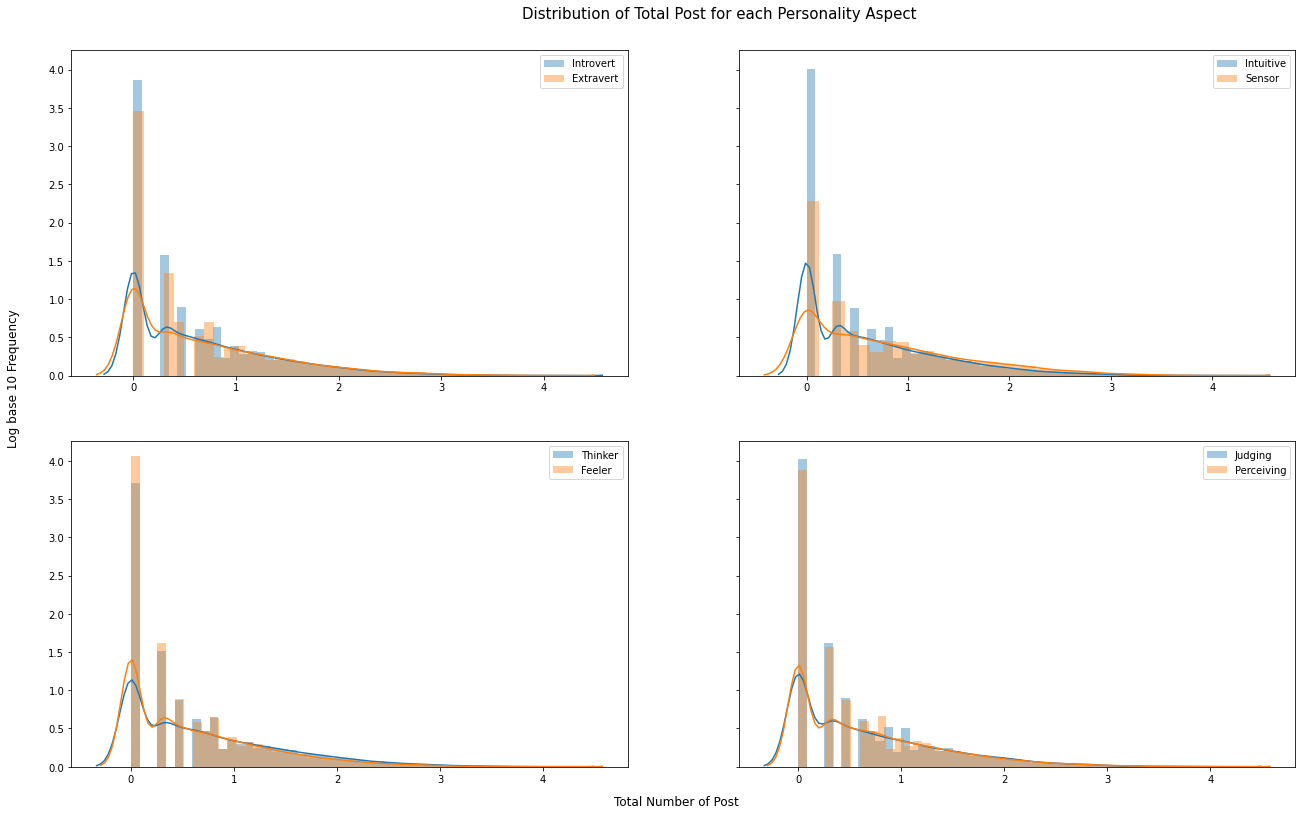

In [0]:
plot_distribution(title='Distribution of Total Post for each Personality Aspect',
                  xlabel='Total Number of Post',
                  ylabel='Log base 10 Frequency',
                  feature='post_count',
                  log=True)

<b> Number of Words per User <b>

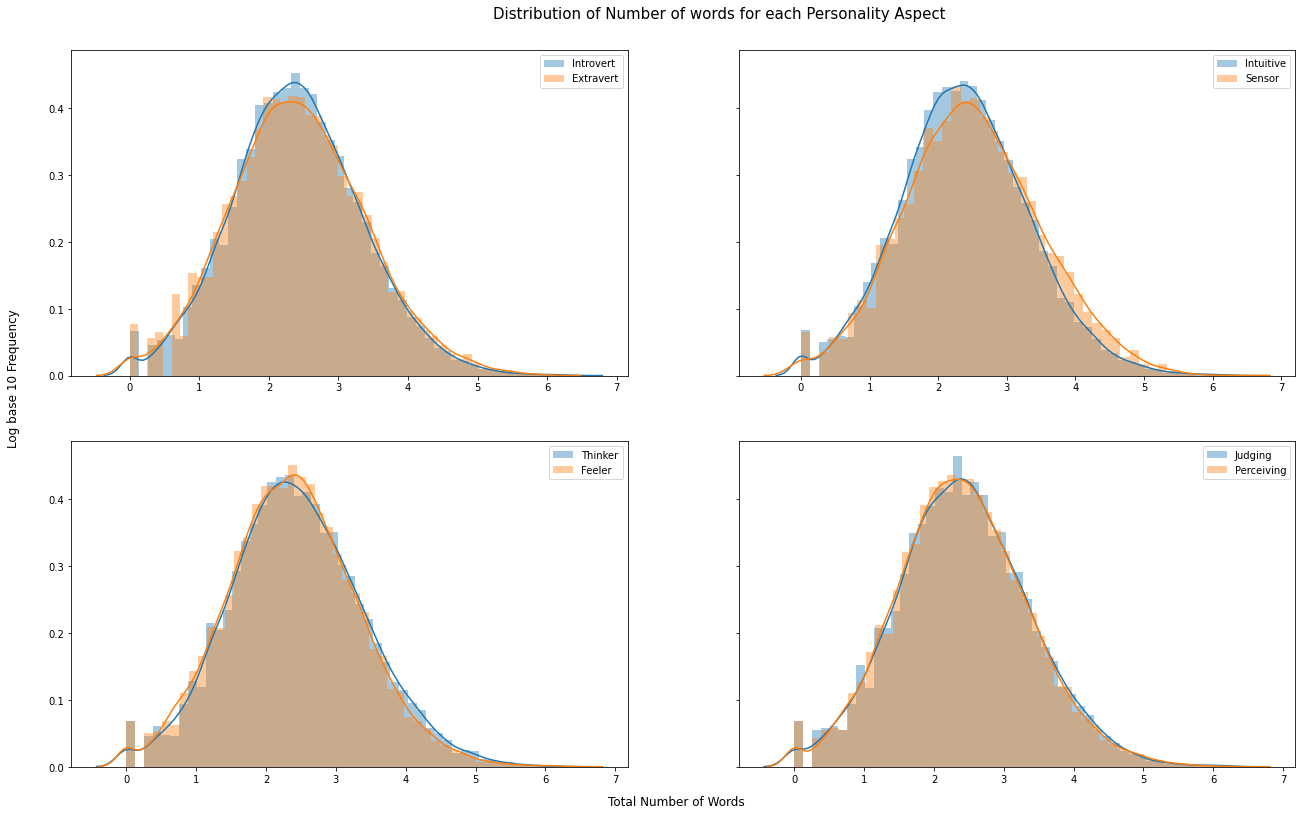

In [0]:
plot_distribution(title='Distribution of Number of words for each Personality Aspect',
                  xlabel='Total Number of Words',
                  ylabel='Log base 10 Frequency',
                  feature='word_count',
                  log=True)

<b>Number of Capitalized Words per Post<b>

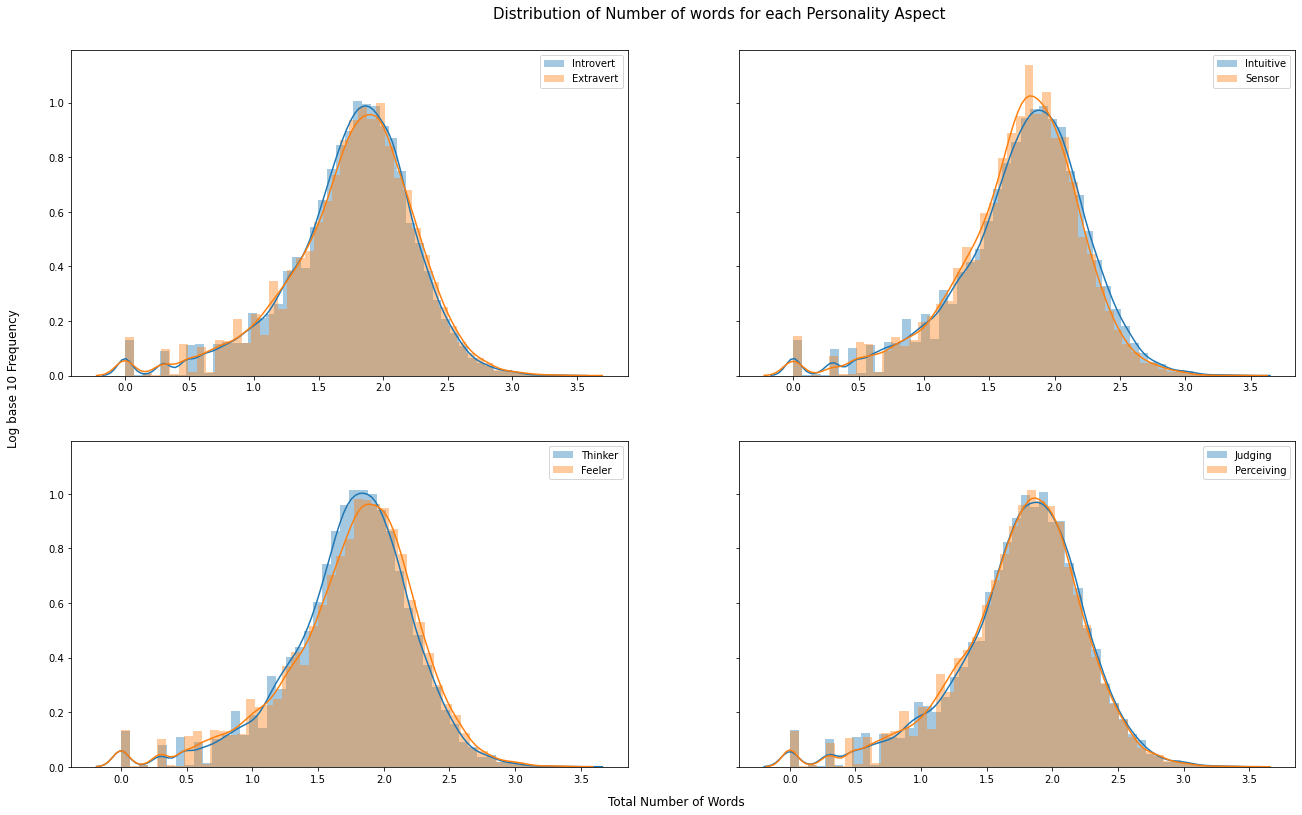

In [0]:
plot_distribution(title='Distribution of Number of words for each Personality Aspect',
                  xlabel='Total Number of Words',
                  ylabel='Log base 10 Frequency',
                  feature='words_per_post',
                  log=True)

<b> Number of Characters Per Post <b>

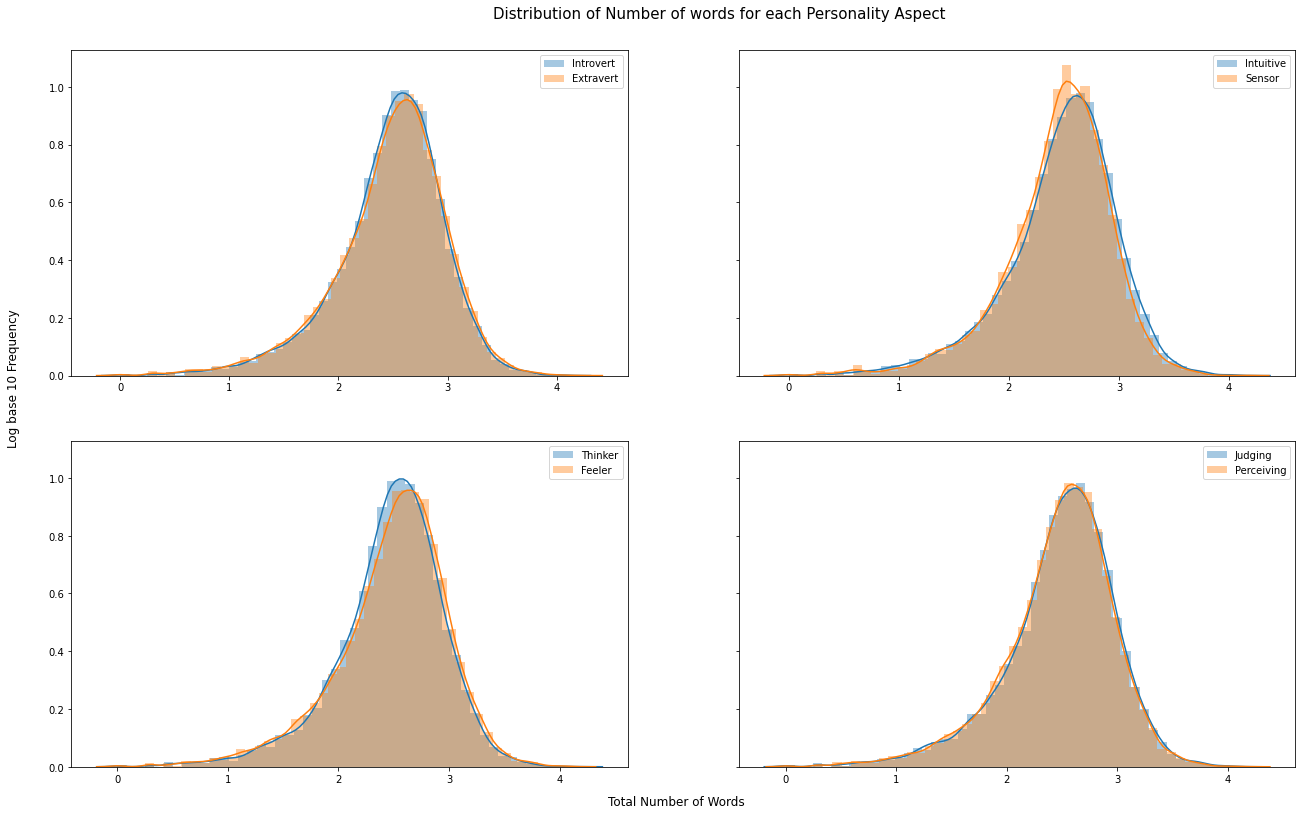

In [0]:
plot_distribution(title='Distribution of Number of words for each Personality Aspect',
                  xlabel='Total Number of Words',
                  ylabel='Log base 10 Frequency',
                  feature='characters_per_post',
                  log=True)

### Data Preprocessing

In [0]:
# df = pd.read_csv(OUTPUT_DIR + 'df_with_meta_features.csv')

In [0]:
from tqdm import tqdm
tqdm.pandas()
df['comment'] = df['comment'].progress_apply(preprocess_after_feature_engineering)
df = df[df['comment'].str.len() > 1]
# df.to_csv(OUTPUT_DIR + 'df_with_meta_features.csv', index=False)

In [0]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from collections import Counter

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

lemma = nltk.wordnet.WordNetLemmatizer()
ps = PorterStemmer()

def get_pos(string):
  ls = word_tokenize(string)
  
  return pd.Series(list(dict(nltk.pos_tag(ls)).values())).value_counts()

def get_stem(string):
  ls = word_tokenize(string)
  ls = list(map(lambda x: lemma.lemmatize(x), ls))
  return ' '.join(ls)

In [0]:
# tqdm.pandas()
# df['comment'] = df['comment'].progress_apply(get_stem)
# df.to_csv(OUTPUT_DIR + 'df_with_meta_features.csv', index=False)

In [0]:
tqdm.pandas()
pos_features = df['comment'].progress_apply(get_pos)

In [0]:
pos_features = pos_features.fillna(0)

In [0]:
pos_features = pos_features.drop(['type', 'comment'], axis=1)

In [230]:
df.shape

(38976, 25)

In [267]:
pos_features.shape

(38976, 38)

In [0]:
new_df = pd.concat([df, pos_features], axis=1) 

In [270]:
new_df.shape

(38976, 63)

In [0]:
new_df.to_csv(OUTPUT_DIR + 'df_with_meta_and_pos_features.csv', index=False)

### 3.4 Train and Test Set Splitting

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df['comment'], df[['I-E', 'N-S', 'T-F', 'J-P']], test_size=0.3, random_state=100)

X_train_I, X_test_I, y_train_I, y_test_I = train_test_split(df.loc[df['I-E']==1, 'comment'], df.loc[df['I-E']==1, 'I-E'], test_size=0.3, random_state=100)
X_train_E, X_test_E, y_train_E, y_test_E = train_test_split(df.loc[df['I-E']==0, 'comment'], df.loc[df['I-E']==0, 'I-E'], test_size=0.3, random_state=100)

X_train_T, X_test_T, y_train_T, y_test_T = train_test_split(df.loc[df['T-F']==1, 'comment'], df.loc[df['T-F']==1, 'T-F'], test_size=0.3, random_state=100)
X_train_F, X_test_F, y_train_F, y_test_F = train_test_split(df.loc[df['T-F']==0, 'comment'], df.loc[df['T-F']==0, 'T-F'], test_size=0.3, random_state=100)

In [0]:
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (27280,)
X_test Shape: (11692,)
y_train Shape: (27280, 4)
y_test Shape: (11692, 4)


### 3.2.1 Feature Extraction

In this section, I will answer the following questions by performing text analysis:

1.) How are word frequencies distributed?

2.) How many unique words are present in the dataset?

3.) What are the top words used? In general and Personality type wise.

4.) Is the text feature stable across train, test and CV datasets?

In [0]:
from collections import Counter, defaultdict

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for word in row.split():
        dictionary[word] +=1
    return dictionary

In [0]:
# building a CountVectorizer with all the words that occured minimum 5 times in train data
def vectorize_words(data):
  text_vectorizer = CountVectorizer(min_df=5, max_df=20000, decode_error='replace')
  train_text_feature_onehotCoding = text_vectorizer.fit_transform(data)
  train_text_features= text_vectorizer.get_feature_names()
  train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1
  text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))
  return text_fea_dict

In [0]:
text_fea_dict = vectorize_words(X_train)
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [0]:
print("Total number of unique words in train data :", len(sorted_text_fea_dict))

Total number of unique words in train data : 65821


In [0]:
temp = pd.DataFrame(pd.Series(index=list(text_fea_dict.keys()), data=list(text_fea_dict.values())).sort_values(ascending=False).head(25)).reset_index()
temp.columns = ['word', 'freq']

In [0]:
temp.style.background_gradient(cmap='Blues')

,word,freq
0,wrote,904206
1,not,796232
2,like,510122
3,people,373346
4,al,372952
5,would,342582
6,one,332387
7,think,306067
8,know,304777
9,get,272251


In [0]:
fig = px.bar(temp, x="freq", y="word", title='Commmon Words in Text', orientation='h', 
             width=700, height=700, color='word')
fig.show()

In [0]:
fig = px.treemap(temp, values='freq', path=['word'], title='Tree of Most Common Words')
fig.show()

In [0]:
text_fea_dict_introv = vectorize_words(X_train_I)
sorted_text_fea_dict_introv = dict(sorted(text_fea_dict_introv.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur_introv = np.array(list(sorted_text_fea_dict_introv.values()))

In [0]:
print("Total number of unique words used by introverts :", len(sorted_text_fea_dict_introv))

Total number of unique words used by introverts : 56232


In [0]:
temp_introv = pd.DataFrame(pd.Series(index=list(text_fea_dict_introv.keys()), data=list(text_fea_dict_introv.values())).sort_values(ascending=False).head(25)).reset_index()
temp_introv.columns = ['word', 'freq']
temp_introv.style.background_gradient(cmap='Blues')

,word,freq
0,wrote,737829
1,not,575442
2,like,359881
3,al,265882
4,people,258160
5,would,253511
6,one,243966
7,know,219543
8,think,215494
9,get,195722


In [0]:
text_fea_dict_extrov = vectorize_words(X_train_E)
sorted_text_fea_dict_extrov = dict(sorted(text_fea_dict_extrov.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur_extrov = np.array(list(sorted_text_fea_dict_extrov.values()))

In [0]:
print("Total number of unique words used by extraverts :", len(sorted_text_occur_extrov))

Total number of unique words used by extraverts : 36831


In [0]:
temp_extrov = pd.DataFrame(pd.Series(index=list(text_fea_dict_extrov.keys()), data=list(text_fea_dict_extrov.values())).sort_values(ascending=False).head(25)).reset_index()
temp_extrov.columns = ['word', 'freq']
temp_extrov.style.background_gradient(cmap='Blues')

,word,freq
0,not,201840
1,wrote,197493
2,like,140018
3,people,100473
4,al,96697
5,would,83989
6,think,83475
7,one,81359
8,know,79137
9,get,74522


In [0]:
text_fea_dict_think = vectorize_words(X_train_T)
sorted_text_fea_dict_think = dict(sorted(text_fea_dict_think.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur_think = np.array(list(sorted_text_fea_dict_think.values()))

In [0]:
print("Total number of unique words used by thinkers :", len(sorted_text_occur_think))

Total number of unique words used by thinkers : 47271


In [0]:
temp_think = pd.DataFrame(pd.Series(index=list(text_fea_dict_think.keys()), data=list(text_fea_dict_think.values())).sort_values(ascending=False).head(25)).reset_index()
temp_think.columns = ['word', 'freq']
temp_think.style.background_gradient(cmap='Blues')

,word,freq
0,not,372941
1,wrote,367485
2,like,222702
3,people,173380
4,al,166027
5,would,163901
6,one,150084
7,think,135308
8,know,132287
9,get,120591


In [0]:
text_fea_dict_feel = vectorize_words(X_train_F)
sorted_text_fea_dict_feel = dict(sorted(text_fea_dict_feel.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur_feel = np.array(list(sorted_text_fea_dict_feel.values()))

In [0]:
print("Total number of unique words used by thinkers :", len(sorted_text_occur_feel))

Total number of unique words used by thinkers : 47921


In [0]:
temp_feel = pd.DataFrame(pd.Series(index=list(text_fea_dict_feel.keys()), data=list(text_fea_dict_feel.values())).sort_values(ascending=False).head(25)).reset_index()
temp_feel.columns = ['word', 'freq']
temp_feel.style.background_gradient(cmap='Blues')

,word,freq
0,wrote,540640
1,not,401787
2,like,281849
3,al,199148
4,people,186107
5,one,175861
6,would,172076
7,know,168576
8,think,162539
9,get,148003


In [127]:
import nltk
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
lemma = nltk.wordnet.WordNetLemmatizer()
from collections import Counter
def get_pos(string):
  ls = word_tokenize(string)
  # nltk.pos_tag(word_tokenize(string))
  ls = list(map(lambda x: lemma.lemmatize(x), ls))
  return ls

df['comment'].apply(get_pos)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [secretive, guy, wrote, thread, like, called, ...
1    [wan, na, write, little, story, reading, story...
2    [caly, goddess, love, wrote, friend, gon, na, ...
3    [would, focus, continue, friendly, guy, true, ...
4    [equal, number, pro, con, point, impasse, soci...
5    [invisibility, hide, everytime, mom, force, so...
6    [like, ncis, ncis, la, time, favorite, tv, sho...
7    [anonymous, wrote, go, ask, beat, around, bush...
8    [freedom, expression, includes, freedom, weari...
9    [think, forced, would, kill, someone, ill, alr...
Name: comment, dtype: object

In [0]:
np.max(list({'cc': 76738,
 'cd': 1650378,
 'dt': 209457,
 'ex': 426,
 'fw': 120268,
 'in': 1960089,
 'jj': 14778027,
 'jjr': 216411,
 'jjs': 275596,
 'md': 1027161,
 'nn': 23006063,
 'nnp': 100257,
 'nnps': 376,
 'nns': 7382105,
 'pdt': 624,
 'pos': 481,
 'prp': 186276,
 'rb': 6385568,
 'rbr': 131876,
 'rbs': 13142,
 'rp': 110868,
 'sym': 552,
 'to': 3008,
 'uh': 39121,
 'vb': 2458951,
 'vbd': 5033584,
 'vbg': 3615040,
 'vbn': 1833444,
 'vbp': 4392643,
 'vbz': 1343288,
 'wdt': 51479,
 'wp': 22417,
 'wrb': 21129}.values()))

23006063